V(t) - V_old + (V_new-V_old)(1-exp(-t/tau))

V_old = island volume after Dorian
V_new = island volume before Dorian == fully recovered state
tau = morphological time scale

tau = (V_new-V_old)/(dV/dt)


tau =  1.8273972602739643
t_50, t_95:  1.266655258721867 5.474392949206857


Text(0, 0.5, 'Volume (Mm$^3$)')

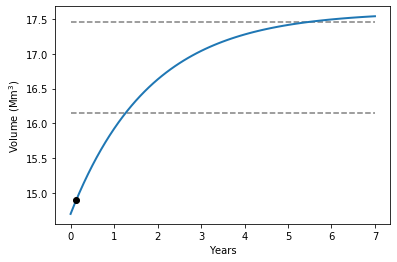

In [22]:
import numpy as np
import matplotlib.pyplot as plt

V_old = 14.7 # volume after Dorian
V_new = 17.6 # fully-recovered volume (same as pre-Dorian volume)
V_nov = 14.9 # volume 46 days after Dorian (partially recovered)

# calculate morph. time scale tau
dV = (V_nov-V_old)
dt = 46/365
tau = (V_new-V_old)/(dV/dt)
print('tau = ',tau)

# calculate half-life toward recovery (t_50) and "full" recovery (t_95)
t_50 = -tau*np.log(.5)
t_95 = -tau*np.log(.05)
print('t_50, t_95: ',t_50, t_95)

# time series of volume
t = np.arange(0.,7.1,.1)
Vt = V_old + (V_new-V_old)*(1.-np.exp(-t/tau))

# plot
plt.plot(t,np.ones_like(t)*V_50,'--',c='gray')
plt.plot(t,np.ones_like(t)*V_95,'--',c='gray')
plt.plot(t,Vt,linewidth=2)
plt.plot(dt,V_nov,'ok')
plt.xlabel('Years')
plt.ylabel('')
plt.ylabel('Volume (Mm$^3$)')

#### Add linear recovery and uncertainty

[-0.03835616  0.          0.20273973]
deld (days), dt (y) 74 0.20273972602739726
tau = 3.37
exponential t_50, t_95: 2.33, 10.09(9.08 - 11.09)
linear t_lin: 3.37 (3.06 - 3.74)


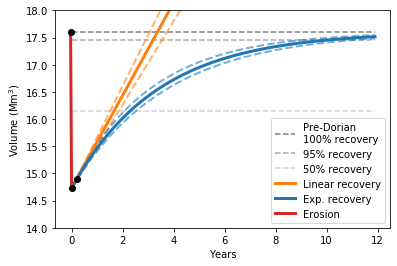

In [64]:
# default color cycle
cmap = plt.get_cmap("tab10")

doy = np.array([242,256,330])
yt = (doy-doy[1])/365.
print(yt)

# vp_tot:  [17583038.42011517 14727060.27768638 14418849.73472998 14888310.14949204]
V_old = 14.727 # volume after Dorian
V_new = 17.6 # fully-recovered volume (same as pre-Dorian volume)
V_nov = 14.9 # volume 46 days after Dorian (partially recovered)

# calculate morph. time scale tau
dV = (V_nov-V_old)
deld = doy[2]-doy[1]
dt = deld/365
print('deld (days), dt (y)',deld,dt)
tau = (V_new-V_old)/(dV/dt)
print('tau = {:.2f}'.format(tau))

# calculate half-life toward recovery (t_50) and "full" recovery (t_95)
t_50 = -tau*np.log(.5)
t_95 = -tau*np.log(.05)
t_95fast = -0.9*tau*np.log(.05)
t_95slow = -1.1*tau*np.log(.05)

print('exponential t_50, t_95: {:.2f}, {:.2f}({:.2f} - {:.2f})'.format(t_50, t_95, t_95fast, t_95slow))

# calculate linear recovery time
t_lin = (V_new-V_old)/(dV/dt)
t_linfast = (V_new-V_old)/(1.1*dV/dt)
t_linslow = (V_new-V_old)/(.9*dV/dt)

print('linear t_lin: {:.2f} ({:.2f} - {:.2f})'.format(t_lin,t_linfast,t_linslow))

# time series of volume
t = np.arange(0.,12,.1)
Vt = V_old + (V_new-V_old)*(1.-np.exp(-t/tau))
Vtfast = V_old + (V_new-V_old)*(1.-np.exp(-t/(0.9*tau)))
Vtslow = V_old + (V_new-V_old)*(1.-np.exp(-t/(1.1*tau)))

Vt_lin = V_old + ((V_nov-V_old)/dt)*t
Vt_linfast = V_old + (1.1*(V_nov-V_old)/dt)*t
Vt_linslow = V_old + (0.9*(V_nov-V_old)/dt)*t

# plot
plt.plot(t,np.ones_like(t)*V_new,'--',c='gray',label='Pre-Dorian\n100% recovery')
plt.plot(t,np.ones_like(t)*V_95,'--',c='darkgray',label='95% recovery')
plt.plot(t,np.ones_like(t)*V_50,'--',c='lightgray',label='50% recovery')

plt.plot(t,Vt_linfast,'--',linewidth=2,c=cmap(1),alpha=0.6)
plt.plot(t,Vt_linslow,'--',linewidth=2,c=cmap(1),alpha=0.6)
plt.plot(t,Vtslow,'--',linewidth=2,c=cmap(0),alpha=0.6)
plt.plot(t,Vtfast,'--',linewidth=2,c=cmap(0),alpha=0.6)
plt.plot(t,Vt_lin,'-',linewidth=3,c=cmap(1),label='Linear recovery')
plt.plot(t,Vt,linewidth=3,c=cmap(0),label='Exp. recovery')

plt.plot([yt[0], 0.],[V_new, V_old],'-',linewidth=3,c=cmap(3),label='Erosion')
plt.plot(yt[0],V_new,'ok')
plt.plot(0.,V_old,'ok')
plt.plot(dt,V_nov,'ok')

plt.xlabel('Years')
plt.ylabel('')
plt.ylabel('Volume (Mm$^3$)')
plt.ylim((14,18))
plt.legend()
plt.savefig('exponential_recover.png',bbox='tight',dpi=200)

In [47]:
cmap(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)